What is the most common way of payments?* Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the [*Chi-squared test*](http://learntech.uwe.ac.uk/da/Default.aspx?pageid=1440) to see whether the method of payment is correlated to the borough. Then, comment the results.

In [1]:
import pandas as pd

In [2]:
number_to_payment = {1: "Credit Card",2: "Cash",3: "No Charge", 4: "Dispute",5: "Unknown",6: "Voided Trip"}

In [3]:
df = pd.DataFrame()

payment = []
zoneId = []
df['payment'] = pd.Series()
df['LocationID'] = pd.Series()
buffer = 10000
#, nrows=buffer*100
for month in ['01', '02', '03', '04', '05']:
    for chunk in pd.read_csv("yellow_tripdata_2018-"+month+".csv", chunksize=buffer, nrows=buffer*10, usecols=['payment_type', 'PULocationID']):
            for payment_type in chunk['payment_type']:
                payment.append(number_to_payment[payment_type])
            zoneId += (list(chunk['PULocationID'])) # I have to store the location id of the pickup, concatenating at the end of a list

    df = df.append(pd.DataFrame({'payment': pd.Series(payment),'LocationID':pd.Series(zoneId)}))
    payment = []
    zoneId = []


zone_lookup = pd.read_csv("taxi_zone_lookup.csv") # this dataset have a map between the LocationID and Borough
df = df.merge(zone_lookup[['LocationID', 'Borough']], how='inner' ,on='LocationID').fillna("") #Inner join between the interested columns and the previous dataset
df = df[['payment', 'Borough']]

In [6]:
df

,payment,Borough
0,Cash,Manhattan
1,Cash,Manhattan
2,Cash,Manhattan
3,Credit Card,Manhattan
4,Credit Card,Manhattan
5,Credit Card,Manhattan
6,Credit Card,Manhattan
7,Cash,Manhattan
8,Credit Card,Manhattan
9,Credit Card,Manhattan


Per ogni quartiere fare un barplot, sulle X ci sta il payment method e sulle Y ci sta la frequenza delle occorrenze

In [4]:
#co sto snippet te tiro fori na mappa de mappe dove naa prima mappa ce sta er quartiere (tipo er broncs)
#na volta che sceji er quartiere taaritrovi n'artra mappa co er numero de pagamenti effettuati per tipo
from collections import Counter
treccani = {}
for index, row in df.iterrows():
    if row['Borough'] not in treccani:
        treccani[row['Borough']] = {}
    if row['payment'] not in treccani[row['Borough']]:
        treccani[row['Borough']][row['payment']] = 1
    else:
        treccani[row['Borough']][row['payment']] += 1

In [6]:
import json
with open('borough_to_number_of_payments_per_type.json', 'w') as fp:
    json.dump(treccani, fp)

In [5]:
treccani

{'Manhattan': {'Cash': 143466,
  'Credit Card': 306909,
  'No Charge': 2377,
  'Dispute': 669},
 'Queens': {'Credit Card': 15928,
  'Cash': 10232,
  'No Charge': 342,
  'Dispute': 86},
 'Bronx': {'Cash': 641, 'Credit Card': 389, 'No Charge': 28, 'Dispute': 9},
 'Brooklyn': {'Cash': 3651,
  'Credit Card': 6166,
  'No Charge': 132,
  'Dispute': 35},
 'Unknown': {'Dispute': 35,
  'Cash': 2975,
  'Credit Card': 5770,
  'No Charge': 125},
 'Staten Island': {'Credit Card': 3, 'Cash': 3},
 'EWR': {'Credit Card': 22, 'Cash': 6, 'No Charge': 1}}

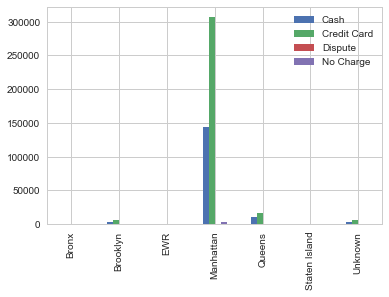

In [16]:
pd.DataFrame(treccani).T.plot(kind='bar')